In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme
pd.set_option('display.max_columns' , None)

In [9]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [10]:
df = pd.DataFrame(data = dataset['data'] , columns= dataset['feature_names'])
df['cancer'] = dataset['target']

In [11]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
X = df.drop('cancer' , axis = 1)
y = df['cancer']

In [51]:
#train test split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
    X,
    y,
    test_size= 0.2,
    random_state= 42,
    stratify= y
)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.transform(X_test)

In [53]:
#train model without pca
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter= 150)
lr.fit(X_train_trans , y_train)
lr.score(X_test_trans , y_test)

0.9824561403508771

In [54]:
# try with PCA
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
X_train_trans = pca.fit_transform(X_train)
X_test_trans = pca.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter= 100)
lr.fit(X_train_trans  , y_train)
lr.score(X_test_trans, y_test)

0.9385964912280702

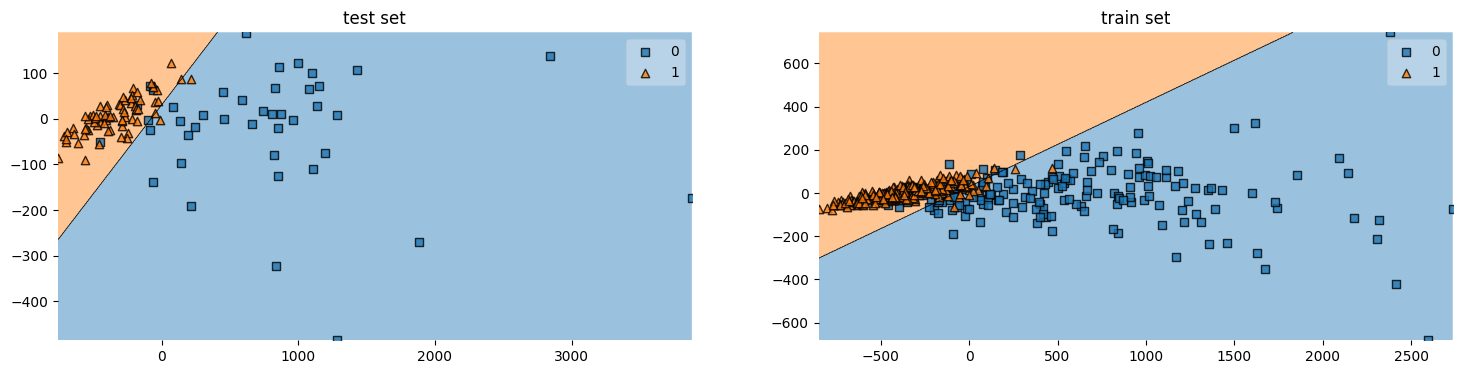

In [74]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(18,4))
plt.subplot(121)
plot_decision_regions(X_test_trans , y_test.values , clf = lr)
plt.title('test set')
plt.subplot(122)
plot_decision_regions(X_train_trans , y_train.values , clf = lr)
plt.title('train set')
plt.show()

In [76]:
[[-1] * 4] * 5

[[-1, -1, -1, -1],
 [-1, -1, -1, -1],
 [-1, -1, -1, -1],
 [-1, -1, -1, -1],
 [-1, -1, -1, -1]]